# Regresja liniowa z regularyzacją

**UWAGA**: w tym notebooku znajduje się sporo tekstu, ale jego druga połowa to duże zadanie.

### Czytanka
Fajne tutoriale, dostarczające sporo intuicji:
* https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
* https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
* Obszerny przykład, omawiający charakterystykę obydwu metod regularyzacji i wpływ doboru parametrów na sposób dopasowania: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
* Konkurs na Kaggle, który dostarcza przydatnego zbioru danych: https://www.kaggle.com/apapiu/regularized-linear-models
* Opis implementacji: http://www.geeksforgeeks.org/linear-regression-python-implementation/
* (*) Implementacja prostej regresji liniowej (od zera): http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/
* (\**) Implementacja regresji dla wielu zmiennych: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/
* Gradient descent: https://en.wikipedia.org/wiki/Gradient_descent

### Podstawowe info
#### 1. Regresja w wielu wymiarach:
Bardzo często chcemy dopasować prostą do danych o większej wymiarowości. Przykładowo, cena domu może zależeć od jego powierzchni, ilości pokoi i ilości pięter (w praktyce takich cech danych może być bardzo dużo). Na szczęście idea jest w zasadzie identyczna, jak przy jednowymiarowej regresji z poprzednich zajęć. Zwróćmy uwagę, że gdy umiemy dopasowywać funkcję liniową w wielu wymiarach, możemy robić różne zagraniczne tricki: nikt nie broni nam sztucznie stworzyć sobie nowych zmiennych, będących nieliniowymi przekształceniami istniejących zmiennych. W ten sposób za pomocą jednego algorytmu możemy dopasowywać zarówno funkcje liniowe, jak i np. wielomiany. (Więcej: na zajęciach). <img src="images/dataset.jpg">

Swoją drogą, w internecie wymiennie można znaleźć pojęcia "multi(ple) regression" i "multivariate regression". Można założyć, że pierwsza z nich odnosi się do funkcji z wielowymiarową dziedziną, ale jednowymiarową przeciwdziedziną, natomiast to drugie: z wielowymiarową dziedziną i przeciwdziedziną.

#### 2. **Gradient descent**:
O ile dla małych/prostych zbiorów danych jesteśmy w stanie wyliczyć najlepsze dopasowanie analitycznie (por. MOwNiT 1, laboratorium), o tyle w praktyce zajęłoby to zbyt dużo czasu. Na szczęście minimalizować funkcję błędu możemy heurystycznie, za pomocą poruszania się w kierunku największego spadku. Intuicja: to tak, jakbyśmy chcieli znaleźć najniższe miejsce w jakiejś kotlinie poprzez rzucenie na ziemię metalowej kulki i sprawdzenie, gdzie się zatrzyma.
<img src="images/gradient_descent.png">
Tak prosta metoda może dość łatwo "utknąć" w minimum lokalnym, ale na szczęście funkcje, z którymi mamy do czynienia przy regresji liniowej są bardzo porządne i mają tylko jedno minimum.

#### 3. **Regularyzacja**:
Intuicja podpowiada "im więcej cech danych, tym lepiej je zrozumiemy". Niestety, życie (i konkursy na Kaggle) uczy, że to błędna intuicja. Część zmiennych nie wnosi żadnej informacji, dane są zaszumione, a czasem informacja jest redundantna. Co się dzieje, jeśli dwie cechy są mocno skorelowane? Jeśli są również mocno skorelowane z wartością, którą przewidujemy, zaczniemy tak naprawdę liczyć tą samą cechę, ale podwójnie (to intuicja, nie poprawne tłumaczenie).


### Pytania
* w jakich sytuacjach zwykła regresja daje złe rezultaty?
* dlaczego chcemy "karać" model za wysokie wagi?

### Zadanie rozgrzewkowe
1. Napisać regresję dla wielu wymiarów.


### Duże zadanie/mały projekt
Zadanie jest z gatunku życiowych, tudzież: przydatnych w karierze zawodowej, więc warto go nie lekceważyć. Będziemy chcieli zrobić coś, co jest chlebem powszednim data scientistów:
0. znaleźć dane
1. wczytać dane do data frame'u
2. wstępnie opisać dane i ew. uzupełnić brakujące
3. narysować wykresy i wypisać podstawowe statystyki
4. wstępnie przetworzyć dane
5. wytrenować modele (zwykła regresja, Lasso, Ridge i dowolny inny model) i sprawdzić ich wydajność

#### 0. znalezienie danych
Dobre będą dla nas jakiekolwiek dane tabelaryczne. Dużo ciekawych danych (a przede wszystkim: konkursów z nimi związanych) można znaleźć na Kagglu, np: https://www.kaggle.com/c/ga-customer-revenue-prediction. Oczywiście są też inne ciekawe strony z danymi, jak choćby https://www.drivendata.org/competitions/.


#### 1. Ładowanie danych
Dane najlepiej załadować do struktury takiej, jak [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Oczywiście można radzić sobie inaczej, ale chyba nie warto.

#### 2. Wstępne opisanie danych i brakujące wartości
Za pomocą metody takiej, jak [`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) warto zbadać, co faktycznie jest w dataframie. Często chcemy się pozbyć brakujących danych (choć niektóre metody sobie z nimi nieźle radzą). Praca z brakującymi danymi dobrze opisana jest [tutaj](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

#### 3. Rysowanie wykresów
Dużo metod lepiej działa na "ładnych" danych. Nie mamy już co prawda brakujących wartości, ale to 1/3 sukcesu. W wielu przypadkach chcemy też pozbyć się "outlierów" (przykładowo, jeśli przewidujemy ceny mieszkań i widzimy, że mamy jedno o powierzchni powyżej 10000m^2 i astronomicznej cenie, co zaburza nam wszystkie statystyki). Równie niechętnie patrzymy na skośne rozkłady -- w idealnym świecie wszystkie przypominałyby rozkład normalny. Warto pomyśleć o zlogarytmowaniu całej kolumny, to często pomaga. Wykresy, a zwłaszcza [histogramy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html#pandas.DataFrame.plot.hist), pomagają nam lepiej poznać rozkłady poszczególnych kolumn.

#### 4. Przetwarzanie danych
Oprócz usuwania outlierów i prostowania rozkładów możemy chcieć wykonać jeszcze szereg modyfikacji na danych, przykładowo:
* zakodować zmienne kategoryczne jako numerki (https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)
* znormalizować dane
* usunąć szumy
* zmniejszyć wymiarowość

Tutaj użytkownikom Pythona warto polecić moduł [Scikit Learn](https://scikit-learn.org/stable/index.html).

#### 5. trenowanie modeli

Chcemy wytrenować na naszych danych łącznie cztery modele:
* Zwykłą regresję liniową
* Regresję z regularyzacją L1 (Lasso)
* Regresję z regularyzacją L2 (Ridge)
Wszystkie trzy są ładnie opisane [tutaj](https://scikit-learn.org/stable/modules/linear_model.html) oraz w linkach na górze strony.

Warto pamiętać o użyciu [kros-walidacji](https://scikit-learn.org/stable/modules/cross_validation.html) do trenowania modeli.

Będzie nas interesować, oprócz tego, który model osiąga najlepsze wyniki, zależność wyników Lasso i Ridge od doboru parametru regularyzacji (jeśli jest niejasne, jak to należy zrobić, warto zobaczyć kagglowy link z góry strony).

**UWAGA**: tym razem bardzo prosiłbym o sporządzenie PDF-ów z wynikami i opisami eksperymentów. Pliki \*.ipynb też są okej.

Powyższy opis używał przykładów dla języka Python. Dowolny język jest dopuszczalny, ale bardzo możliwe, że najrozsądniejszym wyborem będą jednak te ze zbioru {Python, R, Julia} ze wskazaniem na dwa pierwsze. W Julii dataframe'y są, ale nie mogę ręczyć, że wszystkie powyższe ficzery będą łatwo dostępne.

# Analiza cen domów w USA

Jako cel postawiliśmy sobie analizę danych cen domów w USA oraz znalezienie zależności ceny od parametrów domu.

Dane pobraliśmy ze strony Kaggle.

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Wczytanie danych

In [311]:
train_data: pd.DataFrame = pd.read_csv('data/train.csv').select_dtypes(['number']).drop(['Id'], 'columns')

In [312]:
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
7,60,NaN,10382,7,6,1973,1973,240.0,859,32,...,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000


### Usunięcie niepotrzebnych kolumn

Do analizy danych wykorzystamy wyłącznie dane liczbowe. Sens niektórych danych liczbowych jest zależny od pewnego pola opisowego, takich danych się pozbywamy.

In [313]:
train_data = train_data.drop(['MSSubClass', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], 'columns')

In [314]:
train_data.shape

(1460, 24)

## Opisanie danych

### Podstawowe informacje

In [315]:
description = train_data.describe()
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(description)

             LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    10516.828082     6.099315     5.575342  1971.267808   1984.865753   
std      9981.264932     1.382997     1.112799    30.202904     20.645407   
min      1300.000000     1.000000     1.000000  1872.000000   1950.000000   
25%      7553.500000     5.000000     5.000000  1954.000000   1967.000000   
50%      9478.500000     6.000000     5.000000  1973.000000   1994.000000   
75%     11601.500000     7.000000     6.000000  2000.000000   2004.000000   
max    215245.000000    10.000000     9.000000  2010.000000   2010.000000   

        MasVnrArea    BsmtUnfSF  TotalBsmtSF  LowQualFinSF    GrLivArea  \
count  1452.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean    103.685262   567.240411  1057.429452      5.844521  1515.463699   
std     181.066207   441.866955   438.705324     48.623081   525.480383   
min   

### Brakujące dane

Widać, że w niektórych przypadku niektórych cech występuje brak danych. Usuwamy te cechy (np. rok wybudowania garażu.)

In [316]:
train_data = train_data.dropna(axis=1)

### Wykresy

In [317]:
def plot_all_traits(df):
    for trait in df:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        plt.suptitle(trait)
        train_data.hist(column=trait, ax=axes[1])
        train_data.boxplot(column=trait, ax=axes[0])
        axes[0].set_title('')
        axes[1].set_title('')
        plt.show()

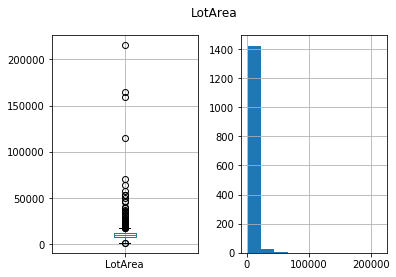

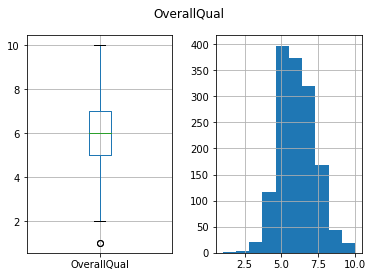

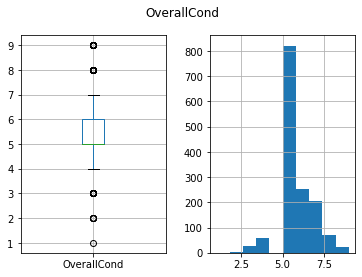

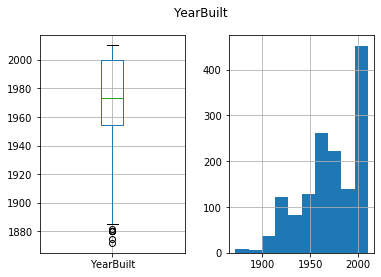

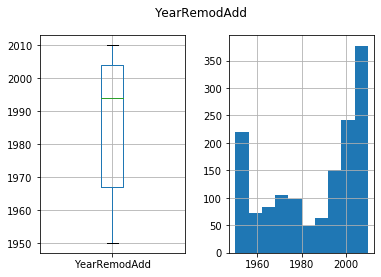

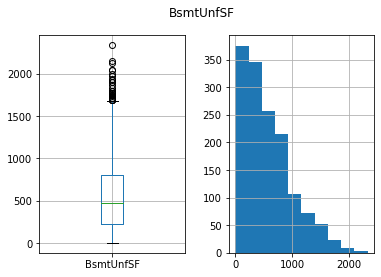

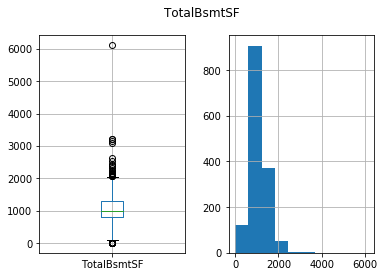

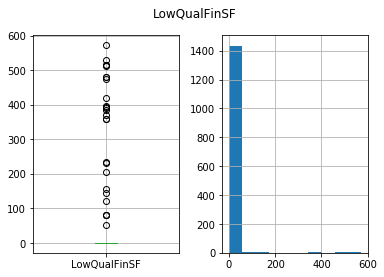

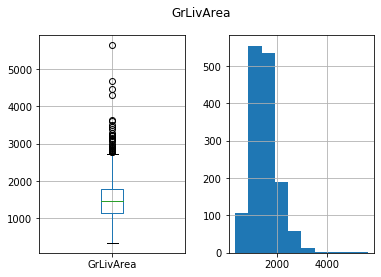

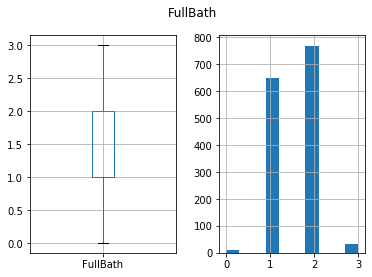

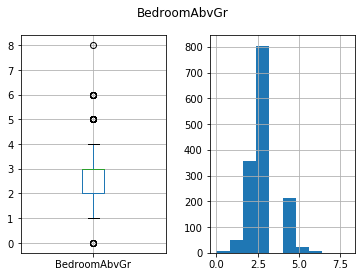

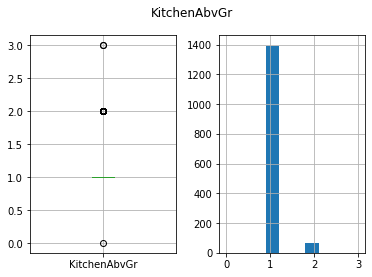

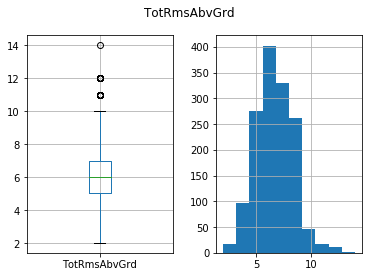

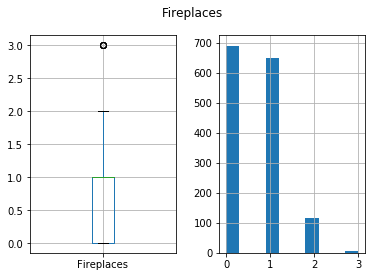

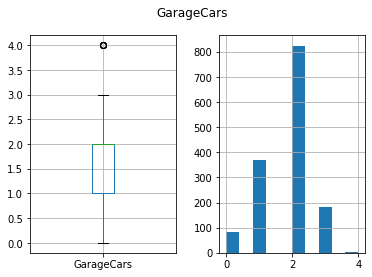

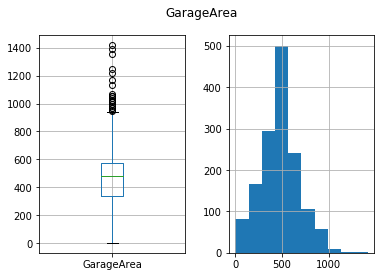

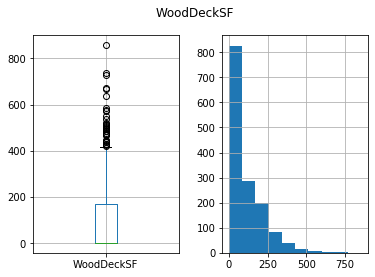

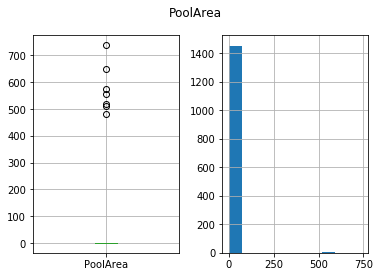

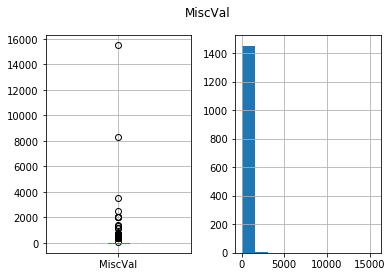

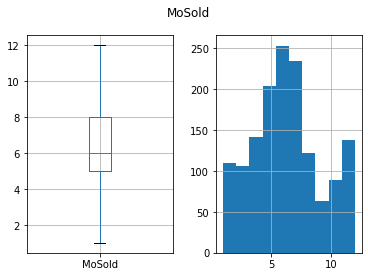

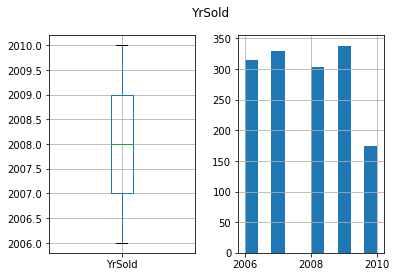

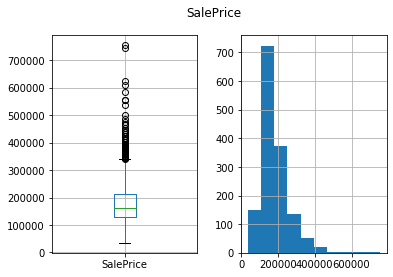

In [318]:
plot_all_traits(train_data)

### Wartości odstające

Po przejrzeniu powyższych wykresów kilka rzeczy rzuca się w oczy:

1. Przy niektórych cechach bardzo niewielki procent ma wartość różną od 0 (rozmiar basenu, rozmiary różnego rodzaju werand, wartość dodatkowych udogodnień, niewykończona powierzchnia)
1. Kilka cech ma dużo wartości odstających (powierzchnie, cena)

Aby rozwiązać te problemy:
1. Usuwamy wartości odstające cech opisanych powyżej
1. Usuwamy kolumny zawierające cechy, które zawsze mają wartość 0

In [319]:
def drop_non_zero(df, name):
    df = df[df[name] == 0]
    return df.drop([name], 'columns')

In [320]:
def drop_quantile(df, name, low=0, high=1):
    q_low = df[name].quantile(low)
    q_high = df[name].quantile(high)
    return df[df[name].between(q_low, q_high)]

In [321]:
train_data = drop_non_zero(train_data, 'PoolArea')
train_data = drop_non_zero(train_data, 'MiscVal')
train_data = drop_non_zero(train_data, 'LowQualFinSF')

In [322]:
train_data = drop_quantile(train_data, 'LotArea', high=0.95)
train_data = drop_quantile(train_data, 'GrLivArea', high=0.95)
train_data = drop_quantile(train_data, 'GarageArea', high=0.95)
train_data = drop_quantile(train_data, 'SalePrice', high=0.95)

### Dane oczyszczone

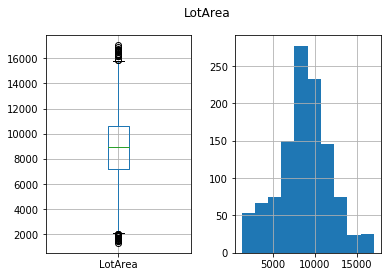

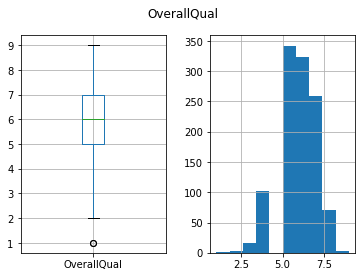

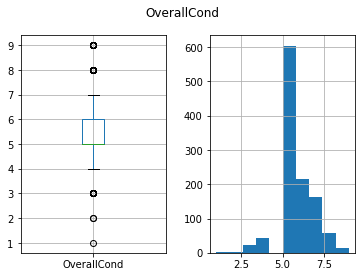

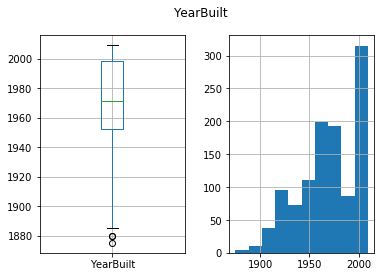

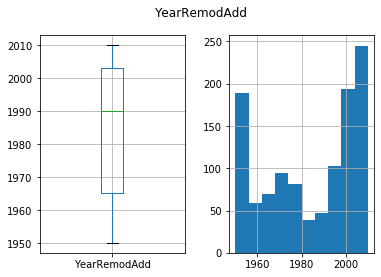

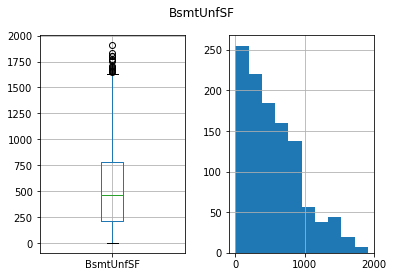

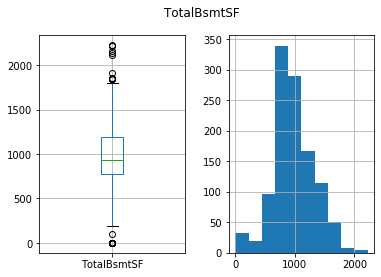

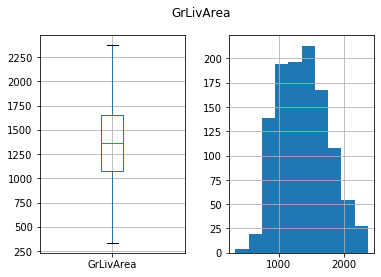

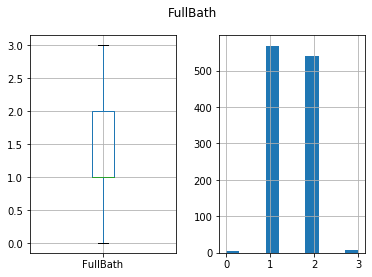

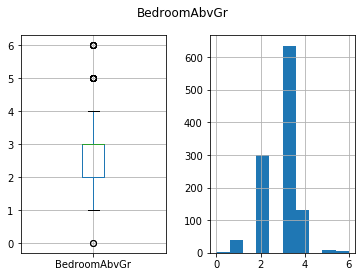

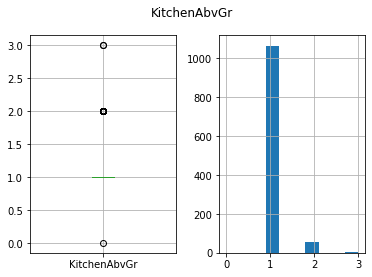

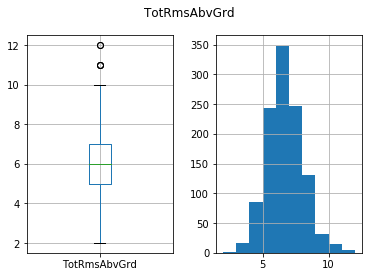

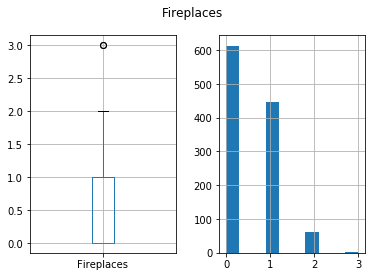

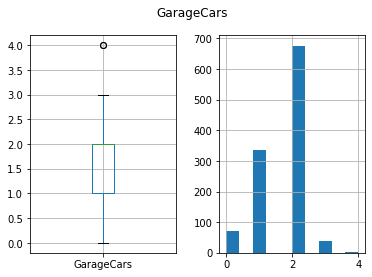

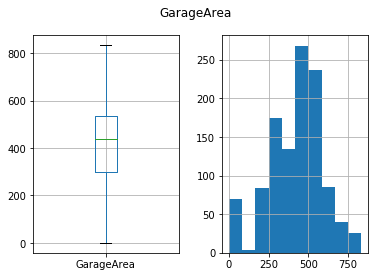

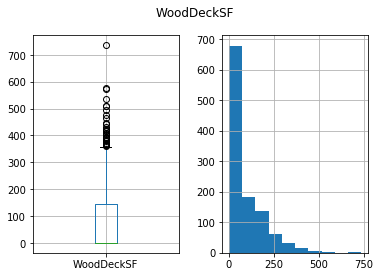

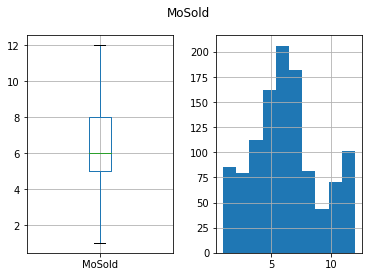

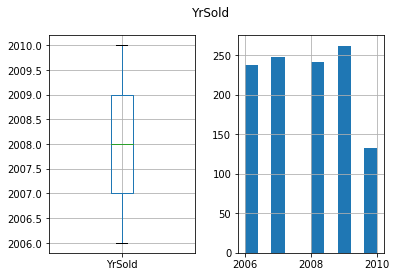

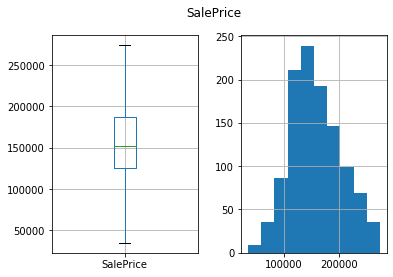

In [323]:
plot_all_traits(train_data)

In [324]:
len(train_data)

1122

## Przetwarzanie danych

Następnym krokiem jest analiza korelacji cech 

In [325]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,SalePrice
LotArea,1,0.0898837,-0.0143042,0.0249709,-0.0237495,0.0672139,0.271857,0.329468,0.119557,0.334008,0.00838916,0.322126,0.228814,0.186391,0.242215,0.101124,-0.00711961,-0.0359595,0.347753
OverallQual,0.0898837,1,-0.0689931,0.555934,0.487035,0.300514,0.384469,0.511738,0.51335,0.0903198,-0.180178,0.302088,0.289447,0.510832,0.465054,0.142192,0.061187,-0.0115638,0.763568
OverallCond,-0.0143042,-0.0689931,1,-0.348719,0.107368,-0.139662,-0.143398,-0.116388,-0.22974,0.002334,-0.0865229,-0.0756321,-0.02821,-0.159647,-0.125862,0.0383737,-0.00918858,0.0301058,-0.0468668
YearBuilt,0.0249709,0.555934,-0.348719,1,0.581547,0.116478,0.338463,0.191847,0.497015,-0.0642562,-0.179222,0.0430267,0.0880905,0.520309,0.481193,0.194698,0.00348411,0.0166498,0.617145
YearRemodAdd,-0.0237495,0.487035,0.107368,0.581547,1,0.144703,0.202222,0.21791,0.417515,-0.0627157,-0.13136,0.0927403,0.017474,0.35532,0.317686,0.175669,0.0019546,0.0689146,0.538282
BsmtUnfSF,0.0672139,0.300514,-0.139662,0.116478,0.144703,1,0.459687,0.249319,0.265682,0.13556,0.040903,0.226937,0.0416235,0.162567,0.130593,-0.0428642,0.0478686,-0.0145503,0.209931
TotalBsmtSF,0.271857,0.384469,-0.143398,0.338463,0.202222,0.459687,1,0.263234,0.249106,0.0527676,-0.0617757,0.134517,0.210589,0.314964,0.359422,0.166432,0.0521172,-0.0128643,0.522745
GrLivArea,0.329468,0.511738,-0.116388,0.191847,0.21791,0.249319,0.263234,1,0.603355,0.556749,0.192041,0.792121,0.378238,0.388101,0.358648,0.0948635,0.0681823,-0.00487658,0.662752
FullBath,0.119557,0.51335,-0.22974,0.497015,0.417515,0.265682,0.249106,0.603355,1,0.298115,0.17767,0.475135,0.14462,0.440415,0.380818,0.106505,0.0403724,0.0373017,0.584305
BedroomAbvGr,0.334008,0.0903198,0.002334,-0.0642562,-0.0627157,0.13556,0.0527676,0.556749,0.298115,1,0.226418,0.698448,0.079759,0.0534648,0.0591138,-0.0121937,0.0599692,-0.0103444,0.183096


Na podstawie analizy macierzy korelacji widzimy kilka zależności których można się intuicyjnie spodziewać:
* Cena sprzedazy najbardziej (wprost proporcjonalnie) zależy od:
    1. ogólnej jakości
    1. powierzchni przestrzeni życiowej 
    1. roku budowy
    1. powierzchni garażu 
    1. liczby łazienek 
    1. rozmiaru piwnicy
* Rozmiar garażu w metrach jest bardzo mocno skorelowany z ilością samochodów które pomieści garaż
* Ogólna jakość jest pozytywnie skorelowana z rokiem budowy, powierzchnią życiową i garażu oraz ilością łazienek (ale nie sypialni czy kuchni)
* Liczba pokoi nad ziemią jest skorelowana z powierzchnią przestrzeni życiowej oraz z liczbą sypialni i łazienek
* Rok budowy jest pozytywnie skorelowany z ogólną jakością, oraz z rokiem remontu kapitalnego (ta sama data jeśli brak remontu)
* Rok i miesiąć sprzedaży nie są skorelowane z żadną inną cechą ( choć dla roku możliwa jest zależność nieliniowa, ze względu na kryzys finansowy 2007-2008)

Są również zaskakujące wnioski:
* Rok budowy jest nieznacznie (-0.35) odwrotnie proporcjonalny do ogólnego stanu, spodziewalibyśmy się raczej relacji wprost proporcjonalnej
* Również korelacja roku remontu do ogólnego stanu jest niewielka (0.10)
* Liczba łazienek jest skorelowana (0.5) z rozmiarem garażu
* Ogólny stan, liczba sypialni i kuchni oraz powierzchnia tarasu są tylko nieznacznie (|_| <= 0.20) skorelowane z ceną sprzedaży (być może zależność jest nieliniowa). Dodatkowo liczba kuchni ma korelację negatywną


Po analizie zdecydowaliśmy się odrzucić następujące cechy:
   * Liczbę samochodów które zmieszczą się w garażu ( korelacja z powierzchnią garażu, gorsze właściwości dla regresji jako zmienna dyskretna )
   * Liczbę pokoi w sumie, kuchni i sypialni( korelacja z przestrzenią życiową, a mniejsza od niej z ceną )
   * Miesiąc sprzedaży ( brak korelacji z czymkolwiek, prawdopodobnie mały wpływ na cenę )
   * Niedokończona powierzchnia piwnicy (nieduża korelacja z ceną, skośny rozkład - regresja zdecydowanie lepiej radzi sobie z danymi o rozkładzie normalnym)

Dodatkowo następujące zmienne poddamy weryfikacji ze względu na możliwą zależność nieliniową:
   * Ogólny stan
   * Powierzchnia tarasu
   * Rok sprzedaży
   * Powierzchnia działki

In [326]:
train_data = train_data.drop(['GarageCars', 'TotRmsAbvGrd', 'BedroomAbvGr', 'MoSold', 'KitchenAbvGr', 'BsmtUnfSF'], 'columns')

In [327]:
train_data.shape

(1122, 13)

Z pierwotnych 23 liczbowych cech, zostało nam w tym momencie 12

Podział danych na cechę przewidywaną (y - cena sprzedaży) i cechy "dane" - X

In [328]:
y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], 'columns')

Podział danych na zbiór treningowy, walidacyjny i testowy:

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size = .3, random_state = 17, shuffle=True) 

In [331]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size = .5, random_state = 17, shuffle=True)

Tworzymy również dane pozbawione niektórych cech o niskiej korelacji z ceną, aby przetestować modele w wersji z i bez nich

In [332]:
X_train_dropped = X_train.drop(['OverallCond', 'WoodDeckSF', 'YrSold', 'LotArea'], 'columns')
X_valid_dropped = X_valid.drop(['OverallCond', 'WoodDeckSF', 'YrSold', 'LotArea'], 'columns')
X_test_dropped = X_test.drop(['OverallCond', 'WoodDeckSF', 'YrSold', 'LotArea'], 'columns')

## Przewidywanie cen domów

Do przewidywania zastosujemy trzy modele regresji: zwykłą, Ridge i Lasso. Ponadto zbadamy modele o różnych wymiarach regresji, hiperparametrach i zestawach użytych cech

**Podstawowe rozwiązanie - regresja liniowa**

Jako podstawowego rozwiązania, które będziemy chcieli poprawić, użyjemy zwykłej regresji liniowej na danych z i bez normalizacji

In [333]:
from sklearn.linear_model import LinearRegression

In [334]:
linreg_model = LinearRegression().fit(X_train, y_train)
linreg_normalized_model = LinearRegression(normalize=True).fit(X_train, y_train)

In [335]:
print('Linear regression R^2 score:', linreg_model.score(X_valid, y_valid))
print('Normalized linear regression R^2 score:', linreg_normalized_model.score(X_valid, y_valid))

Linear regression R^2 score: 0.8494786989384002
Normalized linear regression R^2 score: 0.8494786989383996


Widzimy że wyniki są dość dobre (perfekcyjny wynik to 1.0) oraz że normalizacja danych nie wpływa na trening.

Następnie testujemy, czy model spisze się lepiej dla danych pozbawionych cech nieskorelowanych liniowo z ceną

In [336]:
linreg_model_less_features = LinearRegression().fit(X_train_dropped, y_train)

In [337]:
print('Linear regression with only the linearly corelated features:', \
      linreg_model_less_features.score(X_valid_dropped, y_valid))

Linear regression with only the linearly corelated features: 0.8173395865213257


Wynik jest dość zaskakujący - najwyrazniej nawet dla zwykłej liniowej regresji, cechy te wciąż wnosiły użyteczne informacje

**Regresja wielomianowa**

In [338]:
from sklearn.preprocessing import PolynomialFeatures

In [339]:
class PolynomialRegressor:
    def __init__(self, model, poly: PolynomialFeatures):
        self.model = model
        self.poly = poly
        
    def score(self, X: List[List[float]], y: List[float]):
        return self.model.score(self.poly.fit_transform(X), y)
    
    def fit(self, X: List[List[float]], y: List[float]):
        return self.model.fit(self.poly.fit_transform(X), y)
    
    def predict(self, x: List[float], identifier: int) -> pd.DataFrame:
        return pd.DataFrame({
            'SalePrice': self.model.predict(self.poly.fit_transform([x])),
             'Id': [identifier]
        })

In [340]:
def polynomial_reg_search(max_dim=8):
    best_score = 0
    best_model = best_poly = None
    for i in range(1, max_dim + 1):
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(X_train)
        X_poly_dropped = poly_reg.fit_transform(X_train_dropped)
        X_poly_valid = poly_reg.fit_transform(X_valid)
        X_poly_valid_dropped = poly_reg.fit_transform(X_valid_dropped)

        model = LinearRegression().fit(X_poly, y_train)
        model_dropped = LinearRegression().fit(X_poly_dropped, y_train)
        score = model.score(X_poly_valid, y_valid)
        dropped_score = model_dropped.score(X_poly_valid_dropped, y_valid)
        print(f'Dimension {i}, score: {score}')
        print(f'Dimension {i}, less features, score: {dropped_score}\n')
        
        best_score = max(best_score, dropped_score, score)
        if best_score == score:
            best_model, best_poly = model, poly_reg
        elif best_score == dropped_score:
            best_model, best_poly = model_dropped, poly_reg
            
    return PolynomialRegressor(best_model, best_poly)

In [341]:
print('Polynomial regression R^2 scores:\n')
polynomial_reg_search()

Polynomial regression R^2 scores:

Dimension 1, score: 0.8494786989383999
Dimension 1, less features, score: 0.8173395865213272

Dimension 2, score: 0.8670862899540294
Dimension 2, less features, score: 0.8283963388908391

Dimension 3, score: -16.13984900187935
Dimension 3, less features, score: 0.7355751501053285

Dimension 4, score: -699.218727534734
Dimension 4, less features, score: -2237533.264114985

Dimension 5, score: -628.9425114242891
Dimension 5, less features, score: -23055375.86279455

Dimension 6, score: -1717.6639218257633
Dimension 6, less features, score: -10735646.195746474

Dimension 7, score: -10472.384663248682
Dimension 7, less features, score: -1696477751.2310975

Dimension 8, score: -62540.9164974263
Dimension 8, less features, score: -1771566821.810541



Widzimy że najlepszy wynik osiąga regresja kwadratowa. Dla wymiarów od 3 w górę model rozbiega gwałtownie, możemy zatem założyć, że cena domu zależy liniowo - kwadratowo od naszego zbioru cech

**Regresja z regularyzacją**

Teraz zastosujemy regresję z regularyzacją - Ridge ( z normą L2 ) i Lasso ( z normą L1 )

Do poszukiwań optymalnej wartości hiperparametru alpha zastosujemy walidację krzyżową

In [342]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from typing import Union, List

In [343]:
def linear_alpha_search(regressor: Union[Ridge, Lasso], alphas=None) -> Union[Ridge, Lasso]:
    if alphas is None:
        alphas = np.concatenate([np.linspace(1e-2, 1, 100), np.linspace(1e-3, 1e-2, 10), np.linspace(1, 10, 10)])
    # models are normalized for coefficient analysis later on
    model = GridSearchCV(regressor(normalize=True), cv=5, param_grid={'alpha': alphas}, scoring='r2'). \
    fit(X_train, y_train)
    model_dropped = GridSearchCV(regressor(normalize=True), cv=5, param_grid={'alpha': alphas}, scoring='r2'). \
    fit(X_train_dropped, y_train)
    score = model.score(X_valid, y_valid)
    dropped_score = model_dropped.score(X_valid_dropped, y_valid)
    print(f'Linear score: {score}')
    print(f'Linear less features, score: {dropped_score}\n')
    return model.best_estimator_ if score > dropped_score else model_dropped.best_estimator_

In [344]:
def polynomial_alpha_search(regressor: Union[Ridge, Lasso], max_dim = 3, alphas=None) -> PolynomialRegressor:
    if alphas is None:
        alphas = np.concatenate([np.linspace(1e-2, 1, 50), np.linspace(1e-3, 1e-2, 10), np.linspace(1, 10, 10)])
    best_score = 0
    best_model, best_poly = None, None
    for i in range(2, max_dim + 1):
        poly_reg = PolynomialFeatures(degree=i)
        X_poly = poly_reg.fit_transform(X_train)
        X_poly_dropped = poly_reg.fit_transform(X_train_dropped)
        X_poly_valid = poly_reg.fit_transform(X_valid)
        X_poly_valid_dropped = poly_reg.fit_transform(X_valid_dropped)

        model = GridSearchCV(regressor(normalize=True), cv=5, param_grid={'alpha': alphas}, scoring='r2').fit(X_poly, y_train)
        model_dropped = GridSearchCV(regressor(normalize=True), cv=5, param_grid={'alpha': alphas}, scoring='r2').fit(X_poly_dropped, y_train)
        score = model.score(X_poly_valid, y_valid)
        dropped_score = model_dropped.score(X_poly_valid_dropped, y_valid)
        print(f'Dimension: {i}, score: {score}')
        print(f'Dimension: {i}, less features, score: {dropped_score}\n')
        
        best_score = max(best_score, dropped_score, score)
        if best_score == score:
            best_model, best_poly = model.best_estimator_, poly_reg
        elif best_score == dropped_score:
            best_model, best_poly = model_dropped.best_estimator_, poly_reg
            
    return PolynomialRegressor(best_model, best_poly)

In [345]:
# to suppress ill-conditioned matrix warnings
import warnings
warnings.filterwarnings('ignore')

In [346]:
print('Ridge regression R^2 scores:\n')
best_ridge_linreg = linear_alpha_search(Ridge)
best_ridge_polyreg = polynomial_alpha_search(Ridge, max_dim=4)
print('Linear alpha:', best_ridge_linreg.alpha, 'Polynomial alpha:', best_ridge_polyreg.model.alpha)

Ridge regression R^2 scores:

Linear score: 0.8499310808932593
Linear less features, score: 0.8179080373210796

Dimension: 2, score: 0.8691045595832583
Dimension: 2, less features, score: 0.8230275737101282

Dimension: 3, score: 0.8689965410103712
Dimension: 3, less features, score: 0.8158204260452931

Dimension: 4, score: 0.8660389619209126
Dimension: 4, less features, score: 0.8193397459391034

Linear alpha: 0.009000000000000001 Polynomial alpha: 0.01


Wyniki są niemal identyczne jak w przypadku zwykłej regresji. Model rozbiega wolniej wraz ze wzrostem wymiaru, dodatkowo dostajemy ostrzeżenie o złym uwarunkowaniu macierzy - prawdopodobnie ze względu na gwałtowny wzrost współczynników modelu ze wzrostem wymiaru. Ostrzeżenia zostały wyłączone dla czytelności

In [347]:
print('Lasso regression R^2 scores:\n')
best_lasso_linreg = linear_alpha_search(Lasso)
best_lasso_polyreg = polynomial_alpha_search(Lasso, max_dim=3)
print('Linear alpha:', best_lasso_linreg.alpha, 'Polynomial alpha:', best_lasso_polyreg.model.alpha)

Lasso regression R^2 scores:

Linear score: 0.8494842081046674
Linear less features, score: 0.8173418094856371

Dimension: 2, score: 0.8713356521781708
Dimension: 2, less features, score: 0.82174077526215

Dimension: 3, score: 0.8708559803079228
Dimension: 3, less features, score: 0.8166957045695905

Linear alpha: 10.0 Polynomial alpha: 3.0


Regresja Lasso spisuje się minimalnie lepiej niż Ridge, za to dopasowanie jej zajmuje znacząco dłużej. Ma ona zdolność do automatycznego odrzucenia cech nie wpływających na wynik, którą spróbujemy wykorzystać, analizując współczynniki dla modeli liniowych

**Analiza ważności cech z wykorzystaniem Lasso**

In [348]:
from typing import List

def get_coefs(coefs: np.array, labels: List[str] = list(X_train.columns)) -> pd.DataFrame:
    result = pd.DataFrame(index=['Coefficient'], columns=labels)
    result.iloc[0, :] = coefs
    return result

In [349]:
print('Linear regression coefficients')
get_coefs(linreg_normalized_model.coef_)

Linear regression coefficients


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,WoodDeckSF,YrSold
Coefficient,2.16127,10595.5,5803.52,469.203,202.36,21.0184,39.7195,-749.379,6106.78,20.2913,3.99223,-627.909


In [350]:
print('Ridge coefficients')
get_coefs(best_ridge_linreg.coef_)

Ridge coefficients


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,WoodDeckSF,YrSold
Coefficient,2.15565,10586.2,5642.84,457.414,207.818,20.9636,38.9837,-333.955,6192.9,20.8135,4.29324,-628.578


In [351]:
print('Lasso coefficients')
get_coefs(best_lasso_linreg.coef_)

Lasso coefficients


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,WoodDeckSF,YrSold
Coefficient,2.12125,10696.3,5392.28,450.945,200.194,20.6922,38.6805,0,5927.65,20.2243,2.68289,-428.799


Jak wyglądają współczynniki dla większego alpha?

In [352]:
model = Lasso(normalize=True, alpha=50.).fit(X_train, y_train)
get_coefs(model.coef_)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,Fireplaces,GarageArea,WoodDeckSF,YrSold
Coefficient,1.9265,11125.1,3589.67,391.16,203.087,19.307,36.7833,0,4897.45,20.0647,0,-0


Pierwszą cechą która zostaje uznana za nieważną jest liczba łazienek, następnymi: powierzchnia tarasu i rok sprzedaży

Dwie z nich były "podejrzanymi" już po analizie korelacji. Chcąc uzyskać najlepszy możliwy model, wypróbujemy regresję bez liczby łazienek i powierzchni tarasu

**Poszukiwania najlepszego modelu po wyborze cech**

In [353]:
X_train_dropped = X_train.drop(['WoodDeckSF', 'FullBath'], 'columns')
X_valid_dropped = X_valid.drop(['WoodDeckSF', 'FullBath'], 'columns')
X_test_dropped = X_test.drop(['WoodDeckSF', 'FullBath'], 'columns')

In [354]:
linreg_after_lasso = LinearRegression().fit(X_train_dropped, y_train)
print('Linear regression after lasso feature selection:', linreg_after_lasso.score(X_valid_dropped, y_valid))

Linear regression after lasso feature selection: 0.8490069879364482


In [355]:
print('Polynomial regression R^2 scores after lasso feature selection:\n')
best_poly = polynomial_reg_search(max_dim=5)

Polynomial regression R^2 scores after lasso feature selection:

Dimension 1, score: 0.8494786989383999
Dimension 1, less features, score: 0.8490069879364469

Dimension 2, score: 0.8670862899540294
Dimension 2, less features, score: 0.8768606899049702

Dimension 3, score: -16.13984900187935
Dimension 3, less features, score: 0.7518862160763926

Dimension 4, score: -699.218727534734
Dimension 4, less features, score: -558.7153890012914

Dimension 5, score: -628.9425114242891
Dimension 5, less features, score: -6552.056205150397



Dla klasycznej regresji widizmy nieznaczną poprawę, zwłaszcza przy regresji kwadratowej. Teraz przetestujemy regresję z regularyzacją

In [356]:
print('Ridge regression R^2 scores after lasso feature selection:\n')
best_ridge_linreg = linear_alpha_search(Ridge, alphas=np.linspace(1e-3, 1e-1, 100))
best_ridge_polyreg = polynomial_alpha_search(Ridge, max_dim=3, alphas=np.linspace(2e-3, 1e-2, 80))
print('Linear alpha:', best_ridge_linreg.alpha, 'Polynomial alpha:', best_ridge_polyreg.model.alpha)

Ridge regression R^2 scores after lasso feature selection:

Linear score: 0.8499310808932593
Linear less features, score: 0.8490156545154481

Dimension: 2, score: 0.8691045595832583
Dimension: 2, less features, score: 0.8723766070234247

Dimension: 3, score: 0.8551291100303876
Dimension: 3, less features, score: 0.864865185611415

Linear alpha: 0.009000000000000001 Polynomial alpha: 0.006253164556962025


In [357]:
print('Lasso regression R^2 scores after lasso feature selection:\n')
best_lasso_linreg = linear_alpha_search(Lasso, alphas=np.linspace(9, 11, 100))
best_lasso_polyreg = polynomial_alpha_search(Lasso, max_dim=2, alphas=np.linspace(2, 4, 50))
print('Linear alpha:', best_lasso_linreg.alpha, 'Polynomial alpha:', best_lasso_polyreg.model.alpha)

Lasso regression R^2 scores after lasso feature selection:

Linear score: 0.8494665423046578
Linear less features, score: 0.8487644589616367

Dimension: 2, score: 0.8713493422425692
Dimension: 2, less features, score: 0.8708107277124219

Linear alpha: 10.191919191919192 Polynomial alpha: 3.3061224489795915


Podobnie jak w przypadku klasycznej regresji, przy Ridge również nastąpiła minimalna poprawa, natomiast wyniki Lasso nie zmieniają się znacząco (co ma sens, ponieważ dokonuje ono selekcji cech automatycznie)

Różnice między modelami są nieduże, sprawdzimy więc jeszcze wyniki na nieużywanym wcześniej zbiorze testowym, aby upewnić się, że uzyskane wyniki nie zależą od natury zbioru walidacyjnego

In [358]:
best_poly.score(X_test_dropped, y_test)

0.8345293820566435

In [359]:
best_lasso_polyreg.score(X_test, y_test)

0.8552537388420332

In [360]:
best_ridge_polyreg.score(X_test_dropped, y_test)

0.8552649239955157

Ostatecznie najlepszym modelem wydaje się ten uzyskany poprzez połączenie wyboru cech Lasso i regularyzacji Ridge

## Zgłoszenie na Kaggle

In [361]:
best_model = best_ridge_polyreg

In [362]:
columns = list(X_train_dropped.columns)
columns.append('Id')
submission_data = pd.read_csv("data/test.csv")[columns]

In [363]:
submission_data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Fireplaces,GarageArea,YrSold,Id
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1459.000000,1459.00000,1458.000000,1459.000000,1459.000000
mean,9819.161069,6.078821,5.553804,1971.357779,1983.662783,1046.117970,1486.045922,0.58122,472.768861,2007.769705,2190.000000
std,4955.517327,1.436812,1.113740,30.390071,21.130467,442.898624,485.566099,0.64742,217.048611,1.301740,421.321334
min,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,407.000000,0.00000,0.000000,2006.000000,1461.000000
25%,7391.000000,5.000000,5.000000,1953.000000,1963.000000,784.000000,1117.500000,0.00000,318.000000,2007.000000,1825.500000
50%,9399.000000,6.000000,5.000000,1973.000000,1992.000000,988.000000,1432.000000,0.00000,480.000000,2008.000000,2190.000000
75%,11517.500000,7.000000,6.000000,2001.000000,2004.000000,1305.000000,1721.000000,1.00000,576.000000,2009.000000,2554.500000
max,56600.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,5095.000000,4.00000,1488.000000,2010.000000,2919.000000


Ponieważ dane zawierają wartości brakujące, uzupełnimy je średnimi z danej kolumny

In [364]:
submission_data = submission_data.fillna(submission_data.mean())

In [365]:
submission_data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Fireplaces,GarageArea,YrSold,Id
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000
mean,9819.161069,6.078821,5.553804,1971.357779,1983.662783,1046.117970,1486.045922,0.58122,472.768861,2007.769705,2190.000000
std,4955.517327,1.436812,1.113740,30.390071,21.130467,442.746712,485.566099,0.64742,216.974165,1.301740,421.321334
min,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,407.000000,0.00000,0.000000,2006.000000,1461.000000
25%,7391.000000,5.000000,5.000000,1953.000000,1963.000000,784.000000,1117.500000,0.00000,318.000000,2007.000000,1825.500000
50%,9399.000000,6.000000,5.000000,1973.000000,1992.000000,988.000000,1432.000000,0.00000,480.000000,2008.000000,2190.000000
75%,11517.500000,7.000000,6.000000,2001.000000,2004.000000,1304.000000,1721.000000,1.00000,576.000000,2009.000000,2554.500000
max,56600.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,5095.000000,4.00000,1488.000000,2010.000000,2919.000000


In [366]:
predictions = pd.DataFrame(columns=['Id', 'SalePrice'])

In [367]:
for _, row in submission_data.iterrows():
    x = row.drop('Id').values
    identifier = int(row['Id'])
    predictions = predictions.append(best_model.predict(x, identifier))

In [368]:
predictions.to_csv('data/submission.csv', index=False)

Uzyskane wyniki pozwoliły nam zając 4489 miejsce na 4747, z wynikiem 0.45558 (Root Mean Square Logarithmic Error; najepszy: 0.01005, pierwsza dziesiątka: 0.1, najgorszy 27.82859)

Wyniki byłyby z pewnością lepsze, gdybyśmy używali również cech nieliczbowych :) 